In [2]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed, random
from scipy.stats import rayleigh
from scipy.stats import norm
#from spock import FeatureClassifier
import itertools


In [3]:
import pandas as pd
pairs = pd.read_csv('exoarchive_planet_pairs.csv', index_col=0)

In [4]:
res2 = np.load('res.npy', allow_pickle=True)

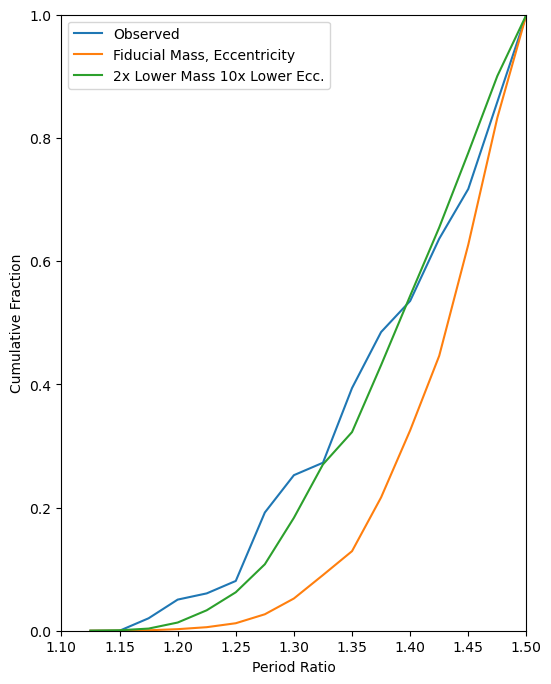

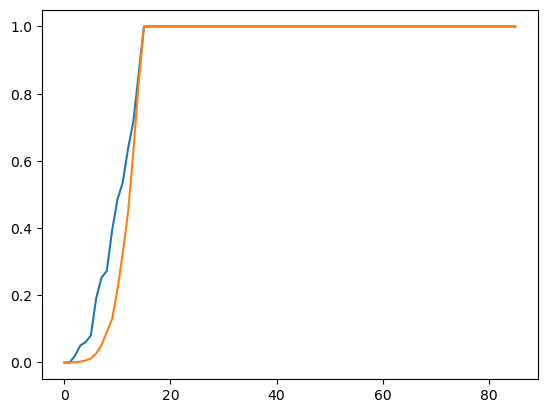

In [7]:
fig, ax= plt.subplots(figsize=(6,8))
bins = np.linspace(1.1, 3.25, 87)
mask = pairs['Pratio'] < 1.5
count, edges = np.histogram(pairs['Pratio'][mask], bins=bins)

pdf = count/sum(count)

cdf_obs = np.cumsum(pdf)
ax.plot(edges[1:], cdf_obs, label='Observed')

labels = ['Fiducial Mass, Eccentricity', '75% Mass 30% Eccentricity', '2x Lower Mass 10x Lower Ecc.']
for i, (m, e, Pratio, prob) in enumerate(res2):
    if i==1:
        continue
    count, edges = np.histogram(Pratio, weights=prob, bins=bins)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)


    ax.plot(edges[1:], cdf, label=labels[i])
    ax.set_xlim([1.1, 1.5])
ax.legend() 
ax.set_ylim([0,1])
ax.set_xlabel('Period Ratio')
ax.set_ylabel('Cumulative Fraction')
fig.savefig('inneredge.pdf', bbox_inches='tight')

plt.show()

for i, (m, e, Pratio, prob) in enumerate(res2):
    count, edges = np.histogram(Pratio, weights=prob, bins=bins)
    pdf = count/sum(count)
    cdf = np.cumsum(pdf)
    if i ==0:
        plt.plot(cdf_obs)
        plt.plot(cdf)
        plt.show()




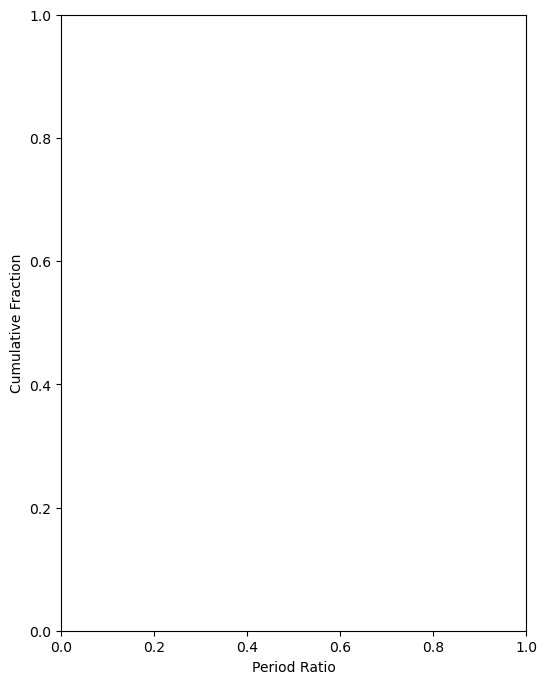

1.15e-05
0.004900000000000001


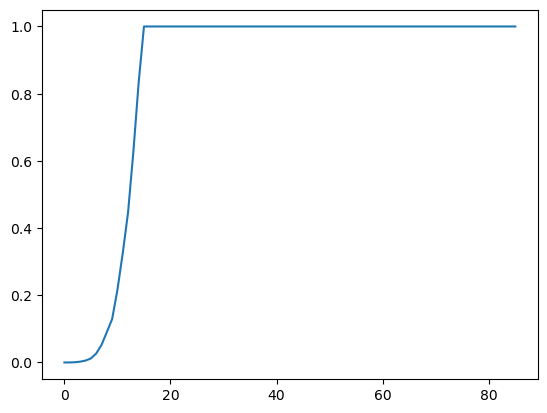

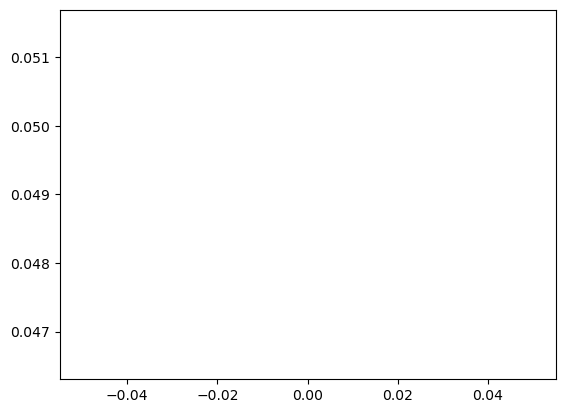

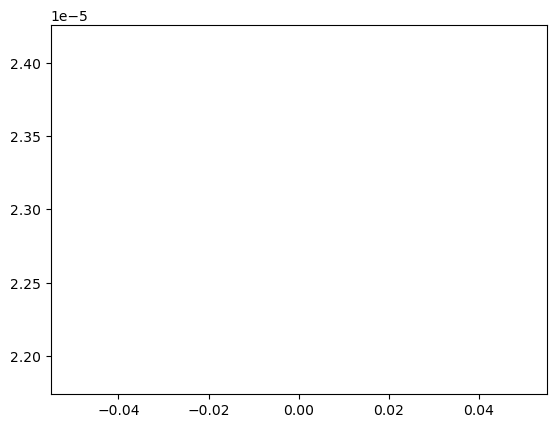

In [15]:
fig, ax= plt.subplots(figsize=(6,8))
bins = np.linspace(1.1, 3.25, 87)
count, edges = np.histogram(pairs['Pratio'], bins=bins)

#pdf = count/sum(count)

#cdf_obs = np.cumsum(pdf)
#ax.plot(edges[1:], cdf_obs, label='Observed')





  
ax.set_ylim([0,1])
ax.set_xlabel('Period Ratio')
ax.set_ylabel('Cumulative Fraction')

plt.show()


e_list = []
m_list = []
prob_list = []
Pratio_list = []

for i, (m, e, Pratio, prob) in enumerate(res2):
    if i ==0:
        m_list = m
        e_list = e
        Pratio_list = Pratio
        prob_list = prob
        
        
print(m)
print(e)
    
    
    
    
count, edges = np.histogram(Pratio_list, weights=prob_list, bins=bins)
pdf = count/sum(count)
cdf = np.cumsum(pdf)




plt.plot(cdf)
plt.show()
plt.plot(e_list)
plt.show()
plt.plot(m_list)
plt.show()
